# Initial Model Building
This file is responsible for Train-test split. Training basic models to get a baseline performance. Evaluating models using chosen metrics (e.g., accuracy, F1-score, RMSE).
Our evaluation is based on MAE.

Step 0: Importing libraries

In [1]:
import pandas as pd
from src.data.data_fetcher import get_all_features, get_raw_data
from src.features.feature_engineering import prepare_data

%pip install scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from src.models.saving import save_predictions
from src.features.preprocess_data import get_preprocessed_test_data, fetch_preprocessed_data

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\gunna\Documents\Maskinlæring\Prosjekt\power-predictor\venv\Scripts\python.exe -m pip install --upgrade pip' command.


 ## Step 1: Importing data

In [2]:
train_a, train_b, train_c, X_train_estimated_a, X_train_estimated_b, X_train_estimated_c, X_train_observed_a, X_train_observed_b, X_train_observed_c, X_test_estimated_a, X_test_estimated_b, X_test_estimated_c = get_raw_data()

## Step 2: Perform temporal alignment on training data

In [3]:
X_train_obs_combined, X_val_obs_combined, y_train_obs_combined, y_val_obs_combined, X_train_est_combined, X_val_est_combined, y_train_est_combined, y_val_est_combined = fetch_preprocessed_data()
X_test_estimated_a_processed, X_test_estimated_b_processed, X_test_estimated_c_processed = get_preprocessed_test_data()

                    time  pv_measurement       date_forecast  \
4355 2019-12-01 09:00:00            4.40 2019-12-01 09:00:00   
4356 2019-12-01 10:00:00           66.00 2019-12-01 10:00:00   
4357 2019-12-01 11:00:00           41.80 2019-12-01 11:00:00   
4358 2019-12-01 12:00:00            4.62 2019-12-01 12:00:00   
4359 2019-12-01 13:00:00            0.00 2019-12-01 13:00:00   

      absolute_humidity_2m:gm3  air_density_2m:kgm3  clear_sky_energy_1h:J  \
4355                     4.800              1.27200           27331.500000   
4356                     4.825              1.27300           98679.046875   
4357                     4.800              1.27350          142199.703125   
4358                     4.750              1.27525          125991.281250   
4359                     4.650              1.27700           61200.398438   

      clear_sky_rad:W  cloud_base_agl:m  dew_or_rime:idx  dew_point_2m:K  ...  \
4355        17.549999        456.250000              0.0      273

## Step 3: Prepare the data for modeling by handling missing values and splitting the data

In [4]:
(X_train_obs_combined.shape, X_val_obs_combined.shape, y_train_obs_combined.shape, y_val_obs_combined.shape, \
 X_train_est_combined.shape, X_val_est_combined.shape, y_train_est_combined.shape, y_val_est_combined.shape)

((2343, 53), (586, 53), (2343,), (586,), (440, 54), (110, 54), (440,), (110,))

### Linear regression model

In [5]:
# Initialize the Linear Regression model
lr_model_obs_combined = LinearRegression()

# Train the Linear Regression model on the observed data
lr_model_obs_combined.fit(X_train_obs_combined, y_train_obs_combined)

LinearRegression()

Linear regression predictions

In [6]:
# Predict the target variable on the validation observed data
y_pred_val_obs_combined = lr_model_obs_combined.predict(X_val_obs_combined)
y_pred_val_est_combined = lr_model_obs_combined.predict(X_val_est_combined)

# Evaluate the model's performance using Mean Absolute Error (MAE) on the combined validation observed data
mae_obs_combined = mean_absolute_error(y_val_obs_combined, y_pred_val_obs_combined)
mae_est_combined = mean_absolute_error(y_val_est_combined, y_pred_val_est_combined)
print('MAE on validation observed data: ', mae_obs_combined)
print('MAE on validation estimated data: ', mae_est_combined)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- date_calc


In [7]:
# Make predictions using the trained Linear Regression model on the processed test estimated data
from src.features.preprocess_data import get_final_prediction


y_pred_test_est_a = lr_model_obs_combined.predict(X_test_estimated_a_processed)
y_pred_test_est_b = lr_model_obs_combined.predict(X_test_estimated_b_processed)
y_pred_test_est_c = lr_model_obs_combined.predict(X_test_estimated_c_processed)
# Combine the predictions from the three locations into a single dataframe

y_pred_test_est_combined = get_final_prediction(y_pred_test_est_a, y_pred_test_est_b, y_pred_test_est_c)
y_pred_test_est_combined.head(20)


            date_calc       date_forecast  absolute_humidity_2m:gm3  \
0 2023-04-30 07:00:04 2023-05-01 00:00:00                       4.4   
1 2023-04-30 07:00:04 2023-05-01 00:15:00                       4.3   
2 2023-04-30 07:00:04 2023-05-01 00:30:00                       4.3   
3 2023-04-30 07:00:04 2023-05-01 00:45:00                       4.3   
4 2023-04-30 07:00:04 2023-05-01 01:00:00                       4.3   

   air_density_2m:kgm3  clear_sky_energy_1h:J  clear_sky_rad:W  \
0                1.286                    0.0              0.0   
1                1.287                    0.0              0.0   
2                1.287                    0.0              0.0   
3                1.287                    0.0              0.0   
4                1.287                    0.0              0.0   

   cloud_base_agl:m  dew_or_rime:idx  dew_point_2m:K  diffuse_rad:W  ...  \
0       1041.199951              0.0      271.700012            0.0  ...   
1       1054.800049     

,id,time,location,prediction
0,0,2023-05-01 00:00:00,A,60.734768
1,1,2023-05-01 01:00:00,A,88.109802
2,2,2023-05-01 02:00:00,A,71.662304
3,3,2023-05-01 03:00:00,A,34.858809
4,4,2023-05-01 04:00:00,A,78.619226
5,5,2023-05-01 05:00:00,A,264.230324
6,6,2023-05-01 06:00:00,A,360.270788
7,7,2023-05-01 07:00:00,A,541.086376
8,8,2023-05-01 08:00:00,A,551.875745
9,9,2023-05-01 09:00:00,A,488.592045


## Step 4: Evaluate the model

## Step 5: Visualize the results

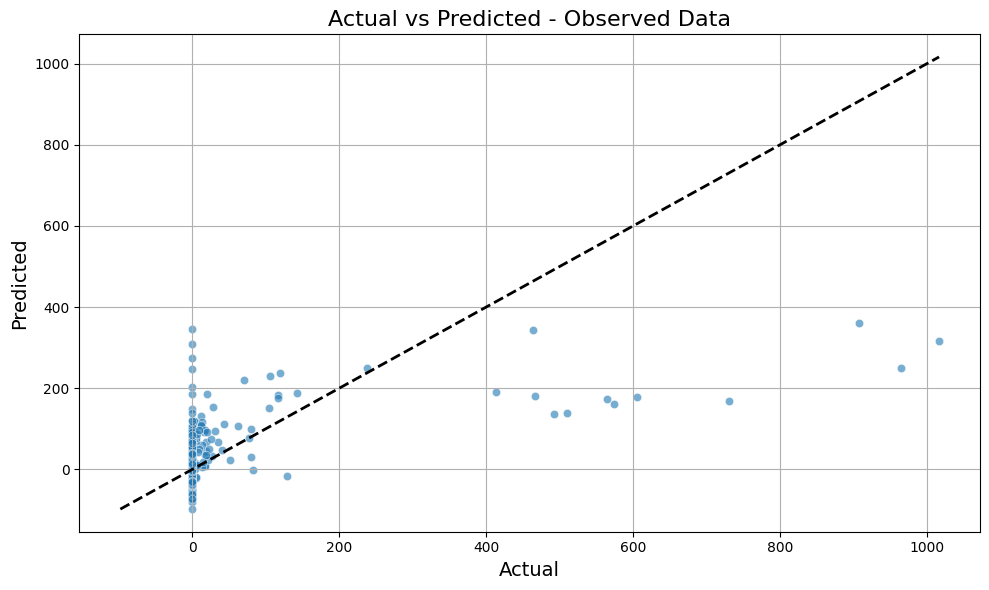

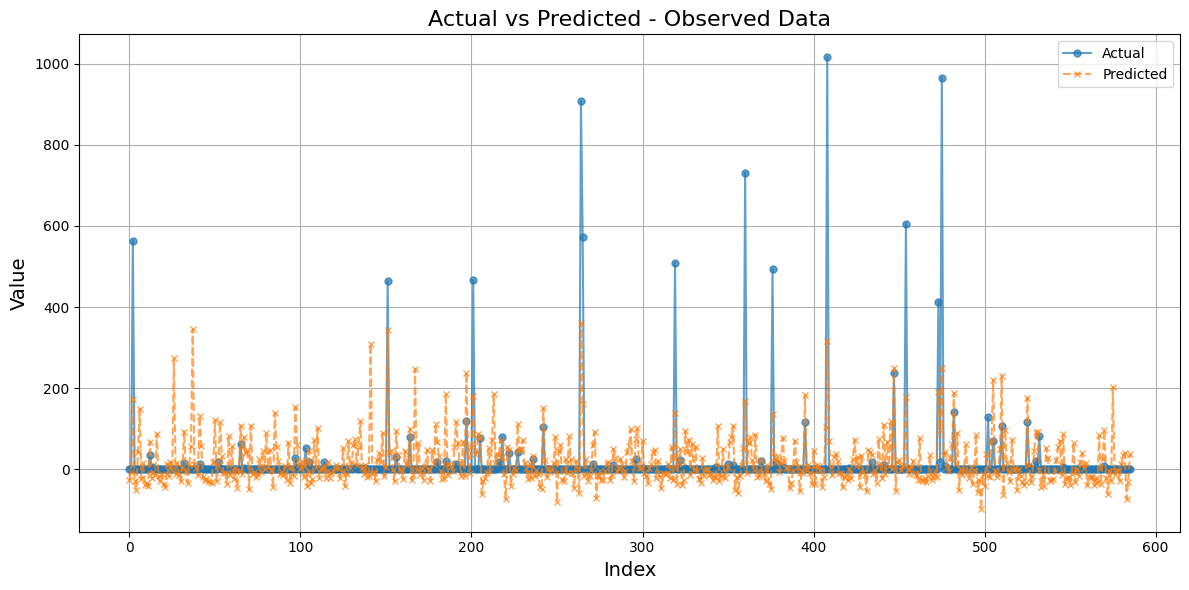

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 1200x600 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt

# Set up the plotting area
plt.figure(figsize=(10, 6))

# Scatter plot of Actual vs Predicted values
plt.scatter(y_val_obs_combined, y_pred_val_obs_combined, alpha=0.6, edgecolors='w', linewidth=0.5)

# Plot a line representing perfect predictions
min_val = min(y_val_obs_combined.min(), y_pred_val_obs_combined.min())
max_val = max(y_val_obs_combined.max(), y_pred_val_obs_combined.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)

# Titles and labels
plt.title('Actual vs Predicted - Observed Data', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Set up the plotting area
plt.figure(figsize=(12, 6))

# Line plot of Actual values
plt.plot(y_val_obs_combined.reset_index(drop=True), label='Actual', linestyle='-', marker='o', markersize=5, alpha=0.7)

# Line plot of Predicted values
plt.plot(pd.Series(y_pred_val_obs_combined, index=y_val_obs_combined.index).reset_index(drop=True), label='Predicted', linestyle='--', marker='x', markersize=5, alpha=0.7)

# Titles and labels
plt.title('Actual vs Predicted - Observed Data', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plots
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(pd.Series(y_pred_test_est_combined, index=X_test_estimated_a_processed.index).reset_index(drop=True), label='Predicted', linestyle='-', marker='o', markersize=5, alpha=0.7)
plt.title('Predicted Values - Test Estimated Data', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Predicted Value', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Step 6: Save the model

In [9]:

save_predictions(y_pred_test_est_combined, 'linear_regression_with_time_data_and_location')

   id  prediction
0   0   60.734768
1   1   88.109802
2   2   71.662304
3   3   34.858809
4   4   78.619226


# Fine-tuning the model

In [ ]:

# Create polynomial features
poly = PolynomialFeatures(degree=2)

# Scale features
scaler = StandardScaler()

# Initialize Ridge Regression model with regularization strength alpha
ridge_model = Ridge(alpha=1.0)

# Create a pipeline with polynomial feature creation, scaling, and Ridge Regression
model = make_pipeline(poly, scaler, ridge_model)

# Train the model with training data
model.fit(X_train_obs_combined, y_train_obs_combined)

# Make predictions on validation data
y_val_pred = model.predict(X_val_obs_combined)

# Calculate Mean Absolute Error on validation data
# mae_obs_combined = mean_absolute_error(y_val_obs_combined, y_pred_val_obs_combined)
mae_val = mean_absolute_error(y_val_obs_combined, y_val_pred)
print('MAE:', mae_val)


MAE: 37.165417427902746
